# Carga y contexto

---



### Carga del data set
Desde un archivo .xlsx

Descargado de:
https://www.data.qld.gov.au/dataset/petroleum-gas-production-and-reserve-statistics/resource/9746212a-e0c6-484d-95ad-b2be1c46027d


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data Science/pg-production_dec-2014_to_jun-2023.xlsx", sheet_name='Data')

In [ ]:
df.columns

Index(['REPORTING_PERIOD', 'PRODUCTION_TYPE', 'AUTHORISED_HOLDER',
       'PERMIT_NUMBER', 'BASIN', 'RESERVOIR_UNIT_NAME', 'STRAT_UNIT_NAME',
       'SECONDARY_STRAT_UNIT_NAME', 'FIELD_NAME', 'GAS_CUM_VOLUME (MM3)',
       'GAS_FLARED/VENTED_CUM_VOLUME (MM3)', 'GAS_USED_CUM_VOLUME (MM3)',
       'OIL_CUM_VOLUME (MMBBL)', 'OIL_USED_CUM_VOLUME', 'LPG_CUM_VOLUME (KT)',
       'LPG_USED_CUM_VOLUME', 'CONDENSATE_CUM_VOLUME (MMBBL)',
       'CONDENSATE_USED_CUM_VOLUME', 'WATER_CUM_VOLUME (ML)',
       'WATER_TOTAL_VOLUME (ML)', 'WELLS_ON_PROD'],
      dtype='object')

### Diccionario

1. REPORTING_PERIOD: Periodo de reporte de los datos.
2. PRODUCTION_TYPE: Tipo de producción (probablemente petróleo, gas natural, etc.).
3. AUTHORISED_HOLDER: Titular autorizado de la licencia de explotación.
4. PERMIT_NUMBER: Número de permiso de explotación.
5. BASIN: Cuenca geológica donde se encuentra el yacimiento.
6. RESERVOIR_UNIT_NAME: Nombre de la unidad de reservorio.
7. STRAT_UNIT_NAME: Nombre de la unidad estratigráfica.
8. SECONDARY_STRAT_UNIT_NAME: Nombre de la unidad estratigráfica secundaria.
9. FIELD_NAME: Nombre del campo petrolífero o gasífero.
10. GAS_CUM_VOLUME (MM3): Volumen acumulado de gas producido (en millones de metros cúbicos).
11. GAS_FLARED/VENTED_CUM_VOLUME (MM3): Volumen acumulado de gas quemado o venteado (en millones de metros cúbicos).
12. GAS_USED_CUM_VOLUME (MM3): Volumen acumulado de gas utilizado (en millones de metros cúbicos).
13. OIL_CUM_VOLUME (MMBBL): Volumen acumulado de petróleo producido (en millones de barriles).
14. OIL_USED_CUM_VOLUME: Volumen acumulado de petróleo utilizado.
15. LPG_CUM_VOLUME (KT): Volumen acumulado de gas licuado de petróleo (GLP) producido (en miles de toneladas).
16. LPG_USED_CUM_VOLUME: Volumen acumulado de GLP utilizado.
17. CONDENSATE_CUM_VOLUME (MMBBL): Volumen acumulado de condensado producido (en millones de barriles).
18. CONDENSATE_USED_CUM_VOLUME: Volumen acumulado de condensado utilizado.
19. WATER_CUM_VOLUME (ML): Volumen acumulado de agua producida (en millones de litros).
20. WATER_TOTAL_VOLUME (ML): Volumen total de agua (posiblemente inyectada o tratada).
21. WELLS_ON_PROD: Número de pozos en producción.


### Contexto
El dataset proporciona un registro histórico de la producción de petróleo y gas, así como información relacionada como volúmenes de gas quemado o venteado, uso de gas y petróleo, producción de líquidos de gas natural (GLP) y condensado, y producción de agua. También incluye datos sobre el número de pozos en producción y su ubicación geográfica.

Se plantea el siguiente objetivo para el análisis:
- Predecir el volumen de gas producido.


# Exploración y visualización (EDA):

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   REPORTING_PERIOD                    16853 non-null  datetime64[ns]
 1   PRODUCTION_TYPE                     16850 non-null  object        
 2   AUTHORISED_HOLDER                   16853 non-null  object        
 3   PERMIT_NUMBER                       16853 non-null  object        
 4   BASIN                               16853 non-null  object        
 5   RESERVOIR_UNIT_NAME                 16694 non-null  object        
 6   STRAT_UNIT_NAME                     8780 non-null   object        
 7   SECONDARY_STRAT_UNIT_NAME           9577 non-null   object        
 8   FIELD_NAME                          16299 non-null  object        
 9   GAS_CUM_VOLUME (MM3)                16787 non-null  float64       
 10  GAS_FLARED/VENTED_CUM_

In [ ]:
df.head()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),...,GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
0,2014-12-31,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,moranbah coal measures,NaN,NaN,mgp,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,2014-12-31,Coal Seam Gas,SANTOS LIMITED,ATP 336,SURAT,walloon coal measures,NaN,NaN,coxon creek (rsg r&c),0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
2,2014-12-31,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,moolayember formation,NaN,NaN,cabawin,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2014-12-31,"Natural Gas, Oil, LPG, Cond",DENISON GAS (QUEENSLAND) PTY LTD,PL 67,BOWEN,catherine sandstone,NaN,NaN,turkey creek - south,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2014-12-31,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,BOWEN,evergreen formation,NaN,NaN,newstead - boxvale,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


In [ ]:
df.tail()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),...,GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_CUM_VOLUME (MMBBL),CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD
16848,2023-06-01,"Natural Gas, Oil, LPG, Cond",BEA GAS PTY LTD,PL 157,COOPER,Toolachee Fm,Toolachee Formation,Toolachee Formation,Ghina,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16849,2023-06-01,"Natural Gas, Oil, LPG, Cond",BEA GAS PTY LTD,PL 188,COOPER,Toolachee Fm,Toolachee Fm,NaN,Ramses,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16850,2023-06-01,"Natural Gas, Oil, LPG, Cond",BEA GAS PTY LTD,PL 188,COOPER,Patchawarra Fm,Patchawarra Fm,NaN,Ramses,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16851,2023-06-01,"Natural Gas, Oil, LPG, Cond",BEA GAS PTY LTD,PL 411,COOPER,Toolachee Fm,Toolachee Fm,NaN,Karnak,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16852,2023-06-01,"Natural Gas, Oil, LPG, Cond",BEA GAS PTY LTD,PL 411,COOPER,Patchawarra Fm,Patchawarra Fm,NaN,Karnak,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(16853, 21)

### Exploración estadistica de variables numericas


#### Exploración numérica
Se exploran las columnas de variables cuantitativas continuas.

In [ ]:
#df.describe()  -> ANÁLISIS DESCRIPTIVO PARA CADA CAMPO

# DESCRIBIR SOLO LAS COLUMNAS DE INTERÉS:

# Lista de columnas que deseas describir
columnas_a_describir = ['GAS_CUM_VOLUME (MM3)', 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)', 'GAS_USED_CUM_VOLUME (MM3)','OIL_CUM_VOLUME (MMBBL)','OIL_USED_CUM_VOLUME', 'LPG_CUM_VOLUME (KT)','LPG_USED_CUM_VOLUME','CONDENSATE_USED_CUM_VOLUME','WATER_CUM_VOLUME (ML)','WATER_TOTAL_VOLUME (ML)']  # Reemplaza con los nombres reales de tus columnas

# Aplica describe() solo a las columnas especificadas
df[columnas_a_describir].describe()

#---------------------------------------------------------------------------------------------------

# ALTERNATIVA

# Lista de columnas que deseas EXCLUIR de la descripción
# columnas_a_excluir = ['Columna2', 'Columna4']

# Aplica describe() excluyendo las columnas especificadas
# descripcion = df.describe(exclude=columnas_a_excluir)

,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),OIL_CUM_VOLUME (MMBBL),OIL_USED_CUM_VOLUME,LPG_CUM_VOLUME (KT),LPG_USED_CUM_VOLUME,CONDENSATE_USED_CUM_VOLUME,WATER_CUM_VOLUME (ML),WATER_TOTAL_VOLUME (ML)
count,16787.000000,16487.000000,16590.000000,15894.000000,1419.000000,16138.000000,1.191000e+03,1.161000e+03,16785.000000,1088.000000
mean,19.161707,0.179151,0.320507,0.001350,0.000050,0.026914,5.022838e-10,8.525478e-07,31.148835,2915.821042
std,94.669996,1.462333,1.872517,0.011267,0.000629,0.152759,1.733425e-08,1.029855e-05,161.261428,15907.330543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.012200,0.000000
75%,0.747554,0.002502,0.026269,0.000054,0.000000,0.000000,0.000000e+00,0.000000e+00,1.068738,122.573890
max,1194.163349,87.567818,54.467537,0.748430,0.012326,3.999097,5.982200e-07,2.235657e-04,5723.600000,235602.526310


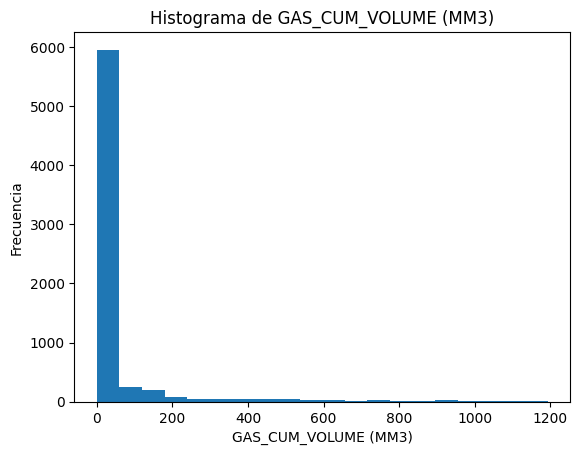

In [ ]:
# Selecciona la columna que deseas visualizar
columna = 'GAS_CUM_VOLUME (MM3)'  # Reemplaza con el nombre de tu columna

# Filtra los valores cero
datos_sin_ceros = df[df[columna] != 0][columna]

# Crea el histograma
plt.hist(datos_sin_ceros, bins=20)  # Ajusta el número de bins según sea necesario
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.title('Histograma de {}'.format(columna))
plt.show()


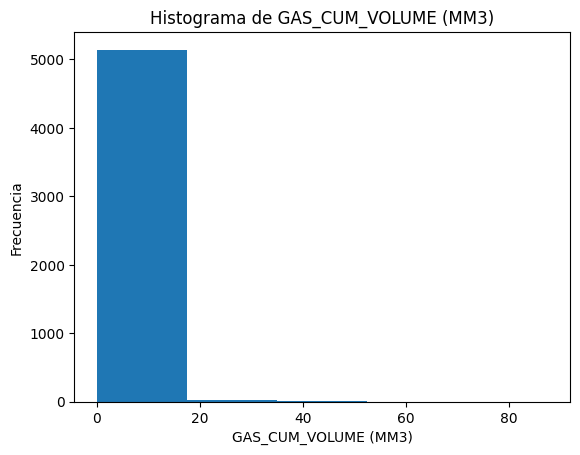

In [ ]:
# Selecciona la columna que deseas visualizar
columna1 = 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)'  # Reemplaza con el nombre de tu columna

# Filtra los valores cero
datos_sin_ceros1 = df[df[columna1] != 0][columna1]

# Crea el histograma
plt.hist(datos_sin_ceros1, bins=5)  # Ajusta el número de bins según sea necesario
plt.xlabel(columna)
plt.ylabel('Frecuencia')
plt.title('Histograma de {}'.format(columna))
plt.show()

##### Limpieza de datos
No puedo realizar una exploración y concluir ningún aspecto utilizando el conjunto de datos completo.
Me quedo con los registros en que el volumen de gas producido <>0

In [ ]:
# Eliminar filas donde GAS_CUM_VOLUME (MM3) es cero
df_seleccionado = df[df['GAS_CUM_VOLUME (MM3)'] != 0]

df_seleccionado[['GAS_CUM_VOLUME (MM3)', 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)', 'GAS_USED_CUM_VOLUME (MM3)']].describe()


,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3)
count,6.889000e+03,6653.000000,6741.000000
mean,4.669293e+01,0.443833,0.788753
std,1.433723e+02,2.276451,2.874133
min,4.000000e-09,0.000000,0.000000
25%,3.031114e-01,0.000035,0.002932
50%,1.377275e+00,0.021614,0.063535
75%,1.388552e+01,0.180000,0.270000
max,1.194163e+03,87.567818,54.467537


* GAS_CUM_VOLUME (MM3): Volumen acumulado de gas producido (en millones de metros cúbicos).
* GAS_FLARED/VENTED_CUM_VOLUME (MM3): Volumen acumulado de gas quemado o venteado (en millones de metros cúbicos).
* GAS_USED_CUM_VOLUME (MM3): Volumen acumulado de gas utilizado (en millones de metros cúbicos).

Se observa que de **media** se producen aprox 47 MM3 de gas, mientras que se ventean a la atmósfera 0.44 MM3 y se utiliza 0.79 MM3.
En todos los casos, la variabilidad de los datos es muy amplia ya que std>>mean


In [ ]:
# Selecciona las primeras 12 columnas y la última
# el df es muy amplio, pueden sacarse muchas más conclusiones
# me quedo únicamente con las columnas con variables categóricas
# y las relacionadas al gas, para evaluar el objetivo elegido anteriormente
# eficiencia y relación venteado/producido
df_seleccionado = df_seleccionado.iloc[:, list(range(12)) + [-1]]
df_seleccionado.head()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),GAS_FLARED/VENTED_CUM_VOLUME (MM3),GAS_USED_CUM_VOLUME (MM3),WELLS_ON_PROD
7,2014-12-31,"Natural Gas, Oil, LPG, Cond",SANTOS LIMITED,PL 131,COOPER,gidgealpa group,NaN,NaN,baryulah,0.98,0.20,0.14,1.0
16,2015-06-30,Coal Seam Gas,SANTOS TOGA PTY LTD,PL 100,BOWEN,bandanna formation,NaN,NaN,fairview,130.29,0.06,0.00,101.0
17,2015-06-30,Coal Seam Gas,SANTOS TOGA PTY LTD,PL 100,BOWEN,cattle creek formation,NaN,NaN,fairview,0.96,0.96,0.00,1.0
39,2015-06-30,Coal Seam Gas,QGC PTY LIMITED,PL 442,SURAT,walloon coal measures,NaN,NaN,"jordan, celeste",4.65,3.56,0.00,48.0
40,2015-06-30,Coal Seam Gas,QGC UPSTREAM HOLDINGS PTY LTD,PL 498,SURAT,walloon coal measures,NaN,NaN,"penrhyn, charlie, phillip, arthur, cameron",0.93,0.93,0.00,5.0


In [ ]:
df_seleccionado.shape

(6955, 13)

In [ ]:
lista_porcentaje_venteado= (df_seleccionado['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'] / df_seleccionado['GAS_CUM_VOLUME (MM3)'])
print(lista_porcentaje_venteado)

#Promedio de los porcentajes venteados
porcentaje_venteado_mean= (df_seleccionado['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'] / df_seleccionado['GAS_CUM_VOLUME (MM3)']).mean()*100
print('promedio de porcentaje venteado=',porcentaje_venteado_mean)

lista_porcentaje_venteado.describe()

7        0.204082
16       0.000461
17       1.000000
39       0.765591
40       1.000000
           ...   
16834    0.000000
16835    0.000000
16838    0.000000
16840    0.000000
16841    0.000000
Length: 6955, dtype: float64
promedio de porcentaje venteado= 8.842311981195824


,0
count,6632.000000
mean,0.088423
std,0.136385
min,0.000000
25%,0.000375
50%,0.024757
75%,0.157310
max,1.000000


**Se puede analizar la distribución de los porcentajes para evaluar la EFICIENCIA de la operación**

Puede verse que el promedio del percentaje de venteo es de casi el 9%, nuevamente, la variabilidad del parámetro es muy amplia.
Se evidencia que hubieron casos en que el venteo llegó al 100%, aunque en el 75% de las ocaciones no superó el 15%.


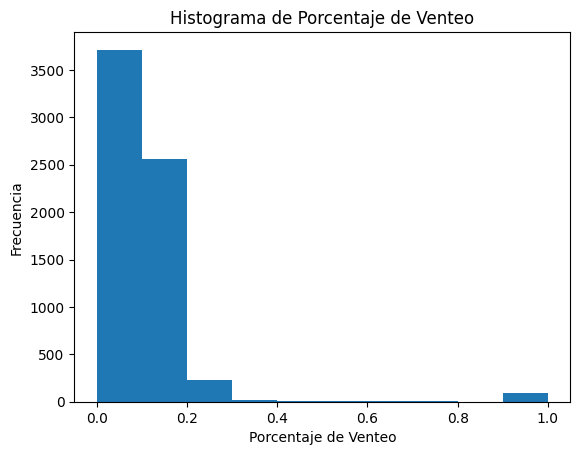

In [ ]:
# Crea el histograma
plt.hist(lista_porcentaje_venteado, bins=10)  # Ajusta el número de bins según sea necesario
plt.xlabel('Porcentaje de Venteo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Porcentaje de Venteo')
plt.show()

In [ ]:
#contar la cantidad de veces que el venteo fue del 100%
(lista_porcentaje_venteado == 1).sum()

71

#### Exploración visual

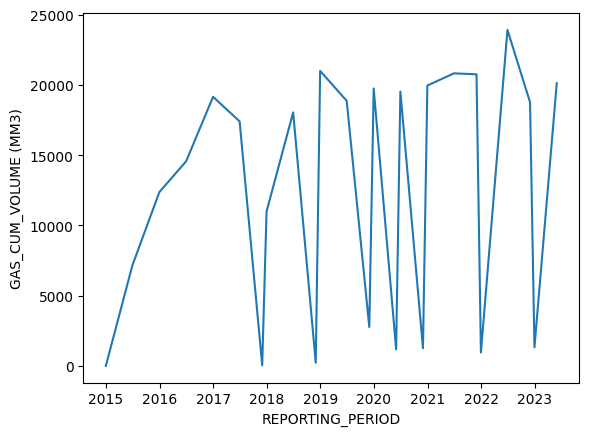

In [ ]:
# Agrupa los datos por 'REPORTING_PERIOD' y suma los valores de 'GAS_CUM_VOLUME (MM3)'
gas_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_CUM_VOLUME (MM3)'].sum()

# Crea el gráfico de líneas
plt.plot(gas_por_periodo.index, gas_por_periodo.values)

# Configura las etiquetas de los ejes
plt.xlabel('REPORTING_PERIOD')
plt.ylabel('GAS_CUM_VOLUME (MM3)')

# Muestra el gráfico
plt.show()

Se observa estacionalidad en la extracción de gas.

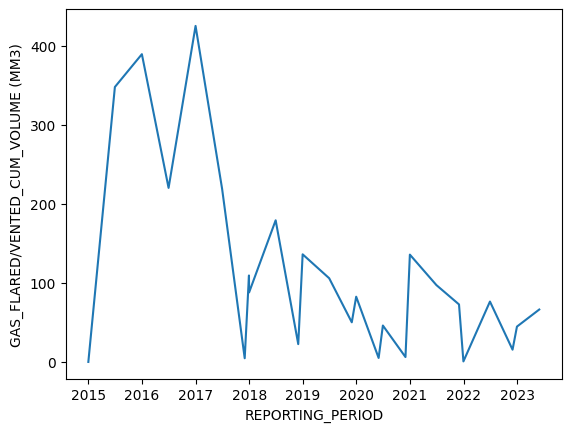

In [ ]:
# Agrupa los datos por 'REPORTING_PERIOD' y suma los valores de 'GAS_CUM_VOLUME (MM3)'
gas_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'].sum()

# Crea el gráfico de líneas
plt.plot(gas_por_periodo.index, gas_por_periodo.values)

# Configura las etiquetas de los ejes
plt.xlabel('REPORTING_PERIOD')
plt.ylabel('GAS_FLARED/VENTED_CUM_VOLUME (MM3)')

# Muestra el gráfico
plt.show()

Se observa que el volúmen de gas venteado se ha reducido en los últimos años.
Como el volumen extraído se mantiene constante mientras que el volumen venteado disminuye se puede decir que a partir de aprox 2018 hubo una mejora en la eficiencia de la operación.

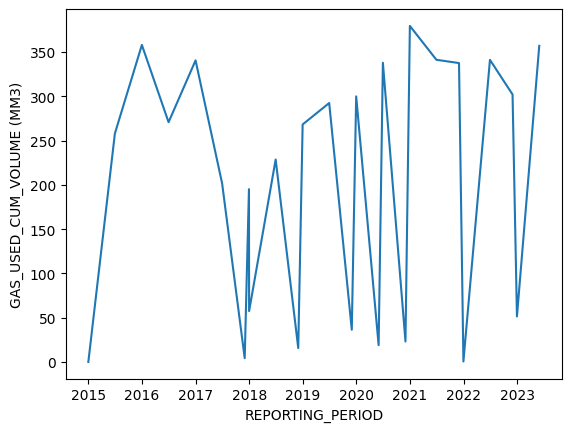

In [ ]:
# Agrupa los datos por 'REPORTING_PERIOD' y suma los valores de 'GAS_CUM_VOLUME (MM3)'
gas_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_USED_CUM_VOLUME (MM3)'].sum()

# Crea el gráfico de líneas
plt.plot(gas_por_periodo.index, gas_por_periodo.values)

# Configura las etiquetas de los ejes
plt.xlabel('REPORTING_PERIOD')
plt.ylabel('GAS_USED_CUM_VOLUME (MM3)')

# Muestra el gráfico
plt.show()

El volumen de gas utilizado se mantiene aproximadamente constante a lo largo de los años.

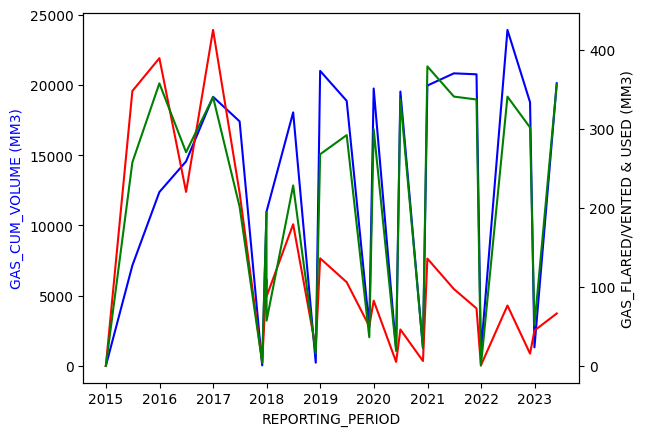

In [ ]:
#quiero graficar de la misma manera en el eje x REPORTING_PERIOD,
#en el eje y GAS_CUM_VOLUME (MM3) y
#en un eje y secundario los valores de GAS_FLARED/VENTED_CUM_VOLUME (MM3) y GAS_USED_CUM_VOLUME (MM3)


# Agrupa los datos por 'REPORTING_PERIOD' y suma los valores relevantes
gas_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_CUM_VOLUME (MM3)'].sum()
gas_flared_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'].sum()
gas_used_por_periodo = df_seleccionado.groupby('REPORTING_PERIOD')['GAS_USED_CUM_VOLUME (MM3)'].sum()

# Crea la figura y el eje principal
fig, ax1 = plt.subplots()

# Grafica 'GAS_CUM_VOLUME (MM3)' en el eje principal
ax1.plot(gas_por_periodo.index, gas_por_periodo.values, color='blue')
ax1.set_xlabel('REPORTING_PERIOD')
ax1.set_ylabel('GAS_CUM_VOLUME (MM3)', color='blue')

# Crea un segundo eje y
ax2 = ax1.twinx()

# Grafica 'GAS_FLARED/VENTED_CUM_VOLUME (MM3)' y 'GAS_USED_CUM_VOLUME (MM3)' en el segundo eje
ax2.plot(gas_flared_por_periodo.index, gas_flared_por_periodo.values, color='red')
ax2.plot(gas_used_por_periodo.index, gas_used_por_periodo.values, color='green')
ax2.set_ylabel('GAS_FLARED/VENTED & USED (MM3)', color='black')

# Muestra el gráfico
plt.show()

en este último gráfico se pueden notar más facilmente la estacionalidad de la extracción y observar la marcada mejora de la eficiencia debido a la disminución del volumen perdido por venteo.

### Exploración estadistica de variables categoricas

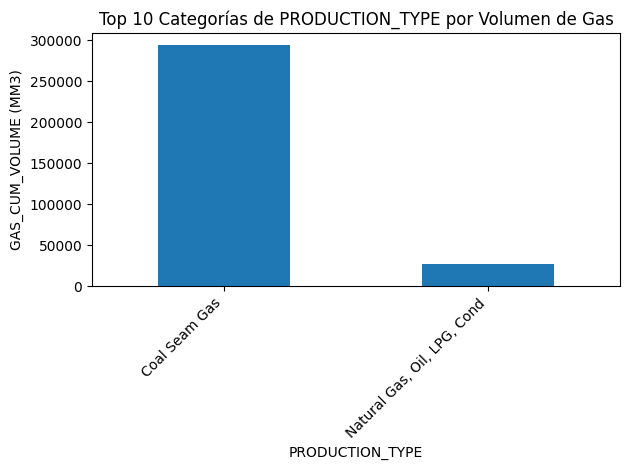

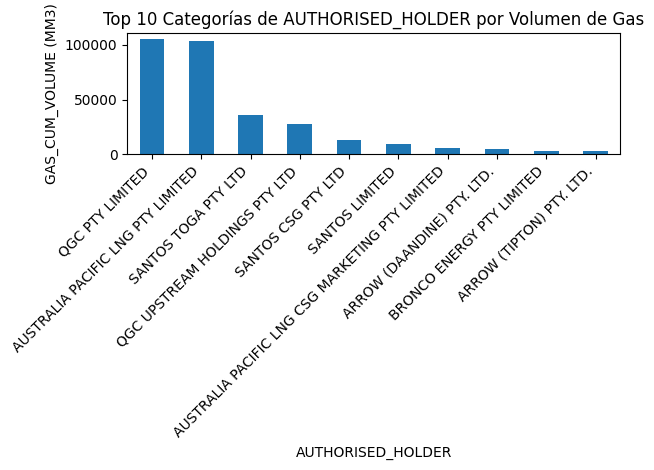

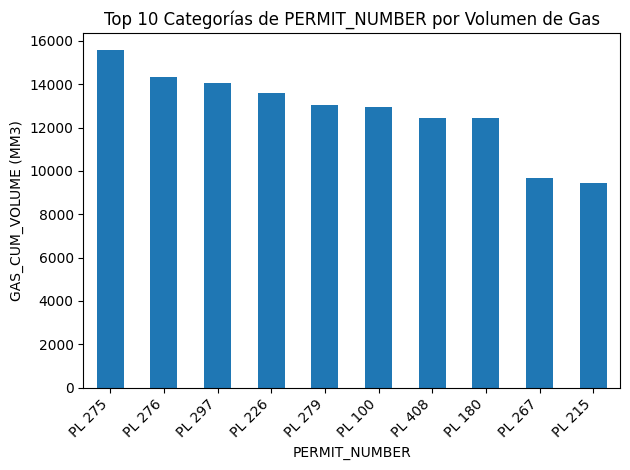

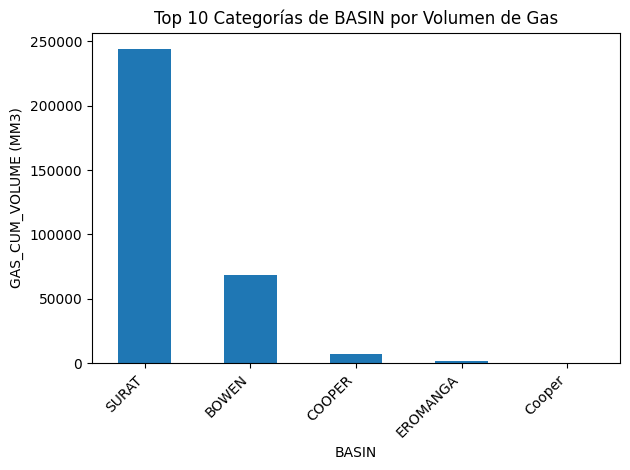

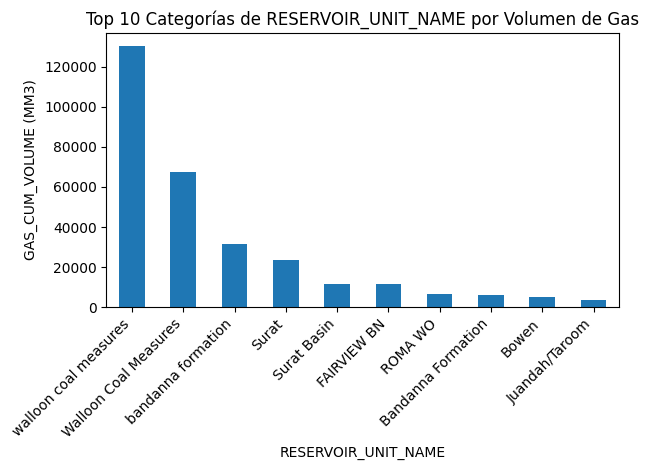

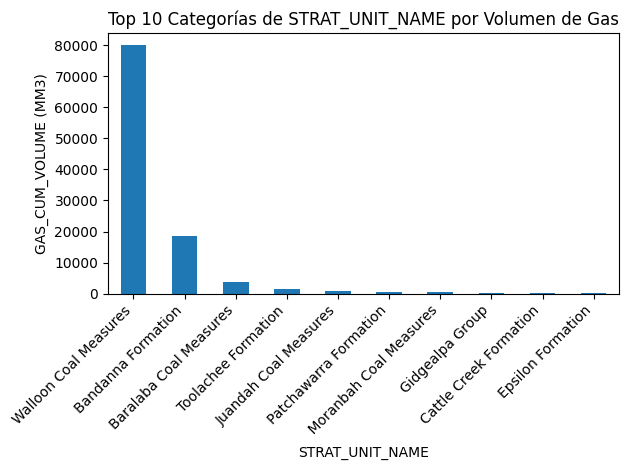

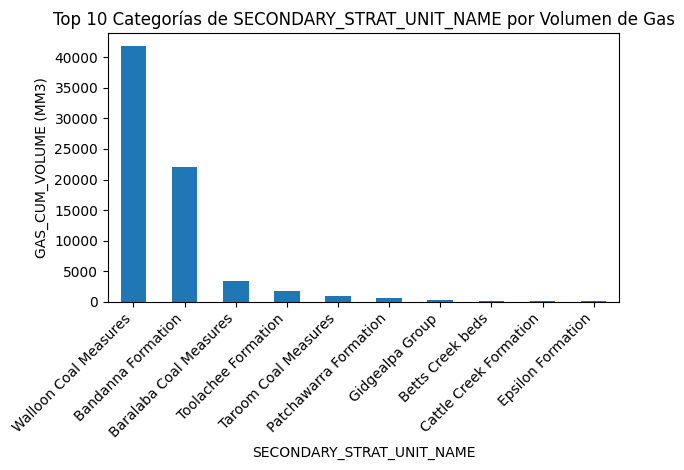

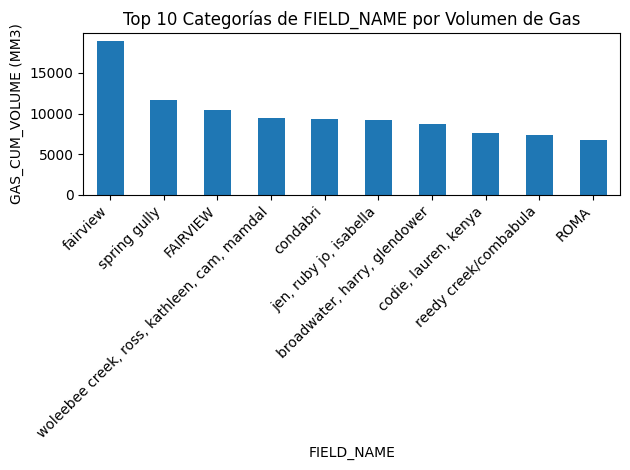

In [ ]:

# Itera sobre las columnas de tipo 'object'
for columna in df_seleccionado.select_dtypes(include=['object']):
  # Agrupa por la columna actual y suma 'GAS_CUM_VOLUME (MM3)'
  gas_por_categoria = df_seleccionado.groupby(columna)['GAS_CUM_VOLUME (MM3)'].sum().sort_values(ascending=False)

  # Toma las 10 categorías principales
  top_10_categorias = gas_por_categoria.head(10)

  # Crea el histograma
  plt.figure()  # Crea una nueva figura para cada histograma
  top_10_categorias.plot(kind='bar')
  plt.xlabel(columna)
  plt.ylabel('GAS_CUM_VOLUME (MM3)')
  plt.title('Top 10 Categorías de {} por Volumen de Gas'.format(columna))
  plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
  plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
  plt.show()


Los Histogramas presentados permiten tener una visión rápida de la producción de gas (MM3) según todas las variables categóricas registradas en el data frame.
En particular es interesante la diferencia en volúmenes de producción entre las diferentes cuencas (basin), reservorios y  unidad estratigráfica.

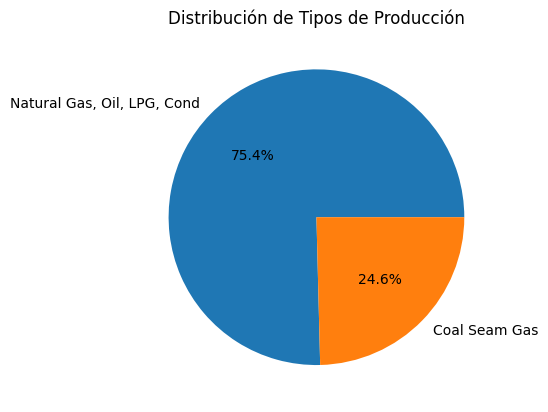

In [ ]:
df_seleccionado['PRODUCTION_TYPE'].value_counts()

# Calcula los conteos de valores para la columna 'PRODUCTION_TYPE'
value_counts = df_seleccionado['PRODUCTION_TYPE'].value_counts()

# Crea el gráfico de torta
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Tipos de Producción')
plt.show()

In [ ]:
df_seleccionado['AUTHORISED_HOLDER'].value_counts()

,count
AUTHORISED_HOLDER,
SANTOS LIMITED,4064
SANTOS TOGA PTY LTD,618
SANTOS CSG PTY LTD,493
QGC PTY LIMITED,340
AUSTRALIA PACIFIC LNG PTY LIMITED,326
QGC UPSTREAM HOLDINGS PTY LTD,235
DENISON GAS (QUEENSLAND) PTY LTD,195
ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,93
BRONCO ENERGY PTY LIMITED,90


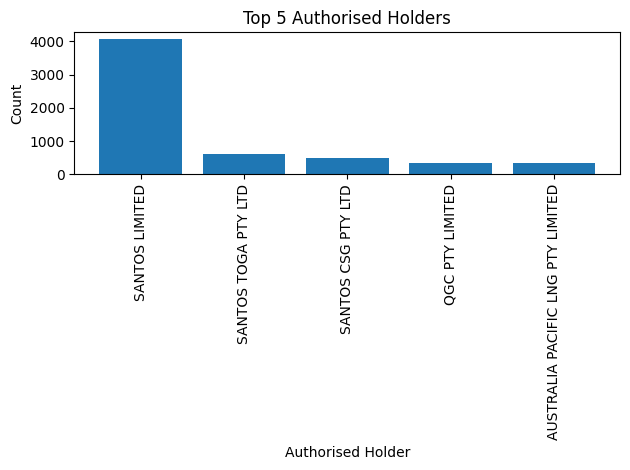

In [ ]:
# Calcula los conteos de valores para la columna 'AUTHORISED_HOLDER'
authoried_holders_counts = df_seleccionado['AUTHORISED_HOLDER'].value_counts().nlargest(5)

# Crea el gráfico de barras
plt.bar(authoried_holders_counts.index, authoried_holders_counts.values)
plt.xlabel('Authorised Holder')
plt.ylabel('Count')
plt.title('Top 5 Authorised Holders')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

Si bien la cantidad de registros para Santos limited es ampliamente superior, el mayor productor de gas es QGC PTY LIMITED. Visualizar al mayor productor por volumen de gas producido me da más información que el productor con más registros.

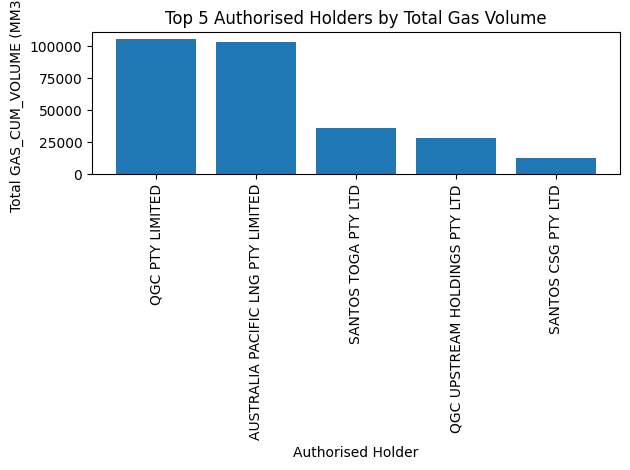

In [ ]:
# Agrupa por 'AUTHORISED_HOLDER' y suma 'GAS_CUM_VOLUME (MM3)'
authoried_holders_gas = df_seleccionado.groupby('AUTHORISED_HOLDER')['GAS_CUM_VOLUME (MM3)'].sum().nlargest(5)

# Crea el gráfico de barras
plt.bar(authoried_holders_gas.index, authoried_holders_gas.values)
plt.xlabel('Authorised Holder')
plt.ylabel('Total GAS_CUM_VOLUME (MM3)')
plt.title('Top 5 Authorised Holders by Total Gas Volume')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

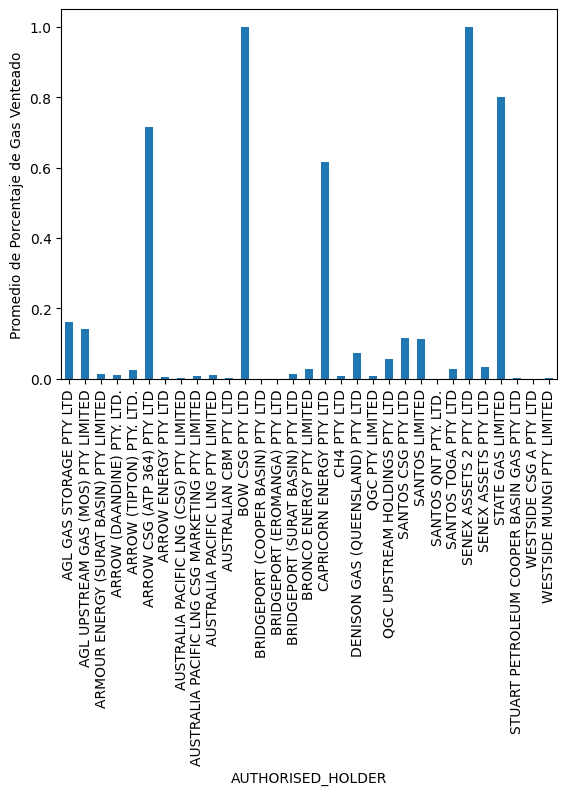

In [ ]:
# Calcula el porcentaje venteado
df_seleccionado['porcentaje_venteado'] = df_seleccionado['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'] / df_seleccionado['GAS_CUM_VOLUME (MM3)']

# Agrupa por 'AUTHORISED_HOLDER' y calcula el promedio del porcentaje venteado
promedio_venteado_por_holder = df_seleccionado.groupby('AUTHORISED_HOLDER')['porcentaje_venteado'].mean()

# Crea el gráfico de barras
promedio_venteado_por_holder.plot(kind='bar')

# Configura las etiquetas de los ejes
plt.xlabel('AUTHORISED_HOLDER')
plt.ylabel('Promedio de Porcentaje de Gas Venteado')

# Muestra el gráfico
plt.show()

Se observa el promedio de gas venteado por empresa extractora.

In [ ]:
# Calcula el porcentaje venteado
df['porcentaje_venteado'] = df['GAS_FLARED/VENTED_CUM_VOLUME (MM3)'] / df['GAS_CUM_VOLUME (MM3)']

# Agrupa por 'AUTHORISED_HOLDER' y calcula el promedio del porcentaje venteado
promedio_venteado_por_holder = df.groupby('AUTHORISED_HOLDER')['porcentaje_venteado'].mean()

# Ordena los holders por promedio de porcentaje venteado de mayor a menor y muestra los 10 primeros
top_10_holders = promedio_venteado_por_holder.sort_values(ascending=False).head(10)

print(top_10_holders)

AUTHORISED_HOLDER
ROMA PETROLEUM PTY LIMITED                 inf
QGC UPSTREAM HOLDINGS PTY LTD              inf
QGC PTY LIMITED                            inf
STATE GAS LIMITED                          inf
BOW CSG PTY LTD                       1.000000
SENEX ASSETS 2 PTY LTD                1.000000
ARROW CSG (ATP 364) PTY LTD           0.714286
CAPRICORN ENERGY PTY LTD              0.616521
AGL GAS STORAGE PTY LTD               0.161081
AGL UPSTREAM GAS (MOS) PTY LIMITED    0.142857
Name: porcentaje_venteado, dtype: float64


# Técnicas de preprocesamiento de las features

In [ ]:
#verificar que se esté utilizando la df completa (16853, 21)
df.shape

(16853, 21)

In [ ]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

,0
REPORTING_PERIOD,0
PRODUCTION_TYPE,3
AUTHORISED_HOLDER,0
PERMIT_NUMBER,0
BASIN,0
RESERVOIR_UNIT_NAME,159
STRAT_UNIT_NAME,8073
SECONDARY_STRAT_UNIT_NAME,7276
FIELD_NAME,554
GAS_CUM_VOLUME (MM3),66


In [ ]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = df.isnull().sum() / len(df) * 100

# Mostrar los resultados
print(null_percentage)

REPORTING_PERIOD                       0.000000
PRODUCTION_TYPE                        0.017801
AUTHORISED_HOLDER                      0.000000
PERMIT_NUMBER                          0.000000
BASIN                                  0.000000
RESERVOIR_UNIT_NAME                    0.943452
STRAT_UNIT_NAME                       47.902451
SECONDARY_STRAT_UNIT_NAME             43.173322
FIELD_NAME                             3.287249
GAS_CUM_VOLUME (MM3)                   0.391622
GAS_FLARED/VENTED_CUM_VOLUME (MM3)     2.171720
GAS_USED_CUM_VOLUME (MM3)              1.560553
OIL_CUM_VOLUME (MMBBL)                 5.690382
OIL_USED_CUM_VOLUME                   91.580134
LPG_CUM_VOLUME (KT)                    4.242568
LPG_USED_CUM_VOLUME                   92.933009
CONDENSATE_CUM_VOLUME (MMBBL)          3.536462
CONDENSATE_USED_CUM_VOLUME            93.111019
WATER_CUM_VOLUME (ML)                  0.403489
WATER_TOTAL_VOLUME (ML)               93.544176
WELLS_ON_PROD                          0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   REPORTING_PERIOD                    16853 non-null  datetime64[ns]
 1   PRODUCTION_TYPE                     16850 non-null  object        
 2   AUTHORISED_HOLDER                   16853 non-null  object        
 3   PERMIT_NUMBER                       16853 non-null  object        
 4   BASIN                               16853 non-null  object        
 5   RESERVOIR_UNIT_NAME                 16694 non-null  object        
 6   STRAT_UNIT_NAME                     8780 non-null   object        
 7   SECONDARY_STRAT_UNIT_NAME           9577 non-null   object        
 8   FIELD_NAME                          16299 non-null  object        
 9   GAS_CUM_VOLUME (MM3)                16787 non-null  float64       
 10  GAS_FLARED/VENTED_CUM_

In [ ]:
# Reemplazar nulos en columnas de texto por 'NO DATA'
columnas_texto = df.select_dtypes(include=['object']).columns
df[columnas_texto] = df[columnas_texto].fillna('NO DATA')

# Reemplazar nulos en columnas numéricas por 0
columnas_numericas = df.select_dtypes(include=['float64']).columns
df[columnas_numericas] = df[columnas_numericas].fillna(0)

In [ ]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

,0
REPORTING_PERIOD,0
PRODUCTION_TYPE,0
AUTHORISED_HOLDER,0
PERMIT_NUMBER,0
BASIN,0
RESERVOIR_UNIT_NAME,0
STRAT_UNIT_NAME,0
SECONDARY_STRAT_UNIT_NAME,0
FIELD_NAME,0
GAS_CUM_VOLUME (MM3),0


## Feature encoding

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME
0,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,moranbah coal measures,NO DATA,NO DATA,mgp
1,Coal Seam Gas,SANTOS LIMITED,ATP 336,SURAT,walloon coal measures,NO DATA,NO DATA,coxon creek (rsg r&c)
2,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,moolayember formation,NO DATA,NO DATA,cabawin
3,"Natural Gas, Oil, LPG, Cond",DENISON GAS (QUEENSLAND) PTY LTD,PL 67,BOWEN,catherine sandstone,NO DATA,NO DATA,turkey creek - south
4,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,BOWEN,evergreen formation,NO DATA,NO DATA,newstead - boxvale


In [ ]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

df.dtypes

,0
REPORTING_PERIOD,datetime64[ns]
PRODUCTION_TYPE,category
AUTHORISED_HOLDER,category
PERMIT_NUMBER,category
BASIN,category
RESERVOIR_UNIT_NAME,category
STRAT_UNIT_NAME,category
SECONDARY_STRAT_UNIT_NAME,category
FIELD_NAME,category
GAS_CUM_VOLUME (MM3),float64


In [ ]:
for col in df.select_dtypes(include=['category']):
    df[col + '_encoded'] = df[col].cat.codes
df.head()

,REPORTING_PERIOD,PRODUCTION_TYPE,AUTHORISED_HOLDER,PERMIT_NUMBER,BASIN,RESERVOIR_UNIT_NAME,STRAT_UNIT_NAME,SECONDARY_STRAT_UNIT_NAME,FIELD_NAME,GAS_CUM_VOLUME (MM3),...,WATER_TOTAL_VOLUME (ML),WELLS_ON_PROD,PRODUCTION_TYPE_encoded,AUTHORISED_HOLDER_encoded,PERMIT_NUMBER_encoded,BASIN_encoded,RESERVOIR_UNIT_NAME_encoded,STRAT_UNIT_NAME_encoded,SECONDARY_STRAT_UNIT_NAME_encoded,FIELD_NAME_encoded
0,2014-12-31,Coal Seam Gas,CH4 PTY LTD,PL 223,BOWEN,moranbah coal measures,NO DATA,NO DATA,mgp,0.0,...,0.0,0.0,0,24,173,2,120,24,22,689
1,2014-12-31,Coal Seam Gas,SANTOS LIMITED,ATP 336,SURAT,walloon coal measures,NO DATA,NO DATA,coxon creek (rsg r&c),0.0,...,0.0,0.0,0,41,6,6,139,24,22,540
2,2014-12-31,"Natural Gas, Oil, LPG, Cond",BRIDGEPORT (SURAT BASIN) PTY LTD,PL 1,BOWEN,moolayember formation,NO DATA,NO DATA,cabawin,0.0,...,0.0,0.0,2,19,13,2,118,24,22,488
3,2014-12-31,"Natural Gas, Oil, LPG, Cond",DENISON GAS (QUEENSLAND) PTY LTD,PL 67,BOWEN,catherine sandstone,NO DATA,NO DATA,turkey creek - south,0.0,...,0.0,0.0,2,27,356,2,106,24,22,893
4,2014-12-31,"Natural Gas, Oil, LPG, Cond",ARMOUR ENERGY (SURAT BASIN) PTY LIMITED,PL 27,BOWEN,evergreen formation,NO DATA,NO DATA,newstead - boxvale,0.0,...,0.0,0.0,2,2,212,2,110,24,22,738


In [ ]:
df.shape
df.dtypes

,0
REPORTING_PERIOD,datetime64[ns]
PRODUCTION_TYPE,category
AUTHORISED_HOLDER,category
PERMIT_NUMBER,category
BASIN,category
RESERVOIR_UNIT_NAME,category
STRAT_UNIT_NAME,category
SECONDARY_STRAT_UNIT_NAME,category
FIELD_NAME,category
GAS_CUM_VOLUME (MM3),float64


## Feature selection


Modelo de aprendizaje supervisado.

**Variable Target: GAS_CUM_VOLUME (MM3) -> Variable cuantitativa**

Regresión: se utiliza cuando la variable objetivo es contínua, cuando queremos predecir un valor numérico.

In [ ]:
data_encoded = df.drop(columnas_texto, axis=1)

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   REPORTING_PERIOD                    16853 non-null  datetime64[ns]
 1   GAS_CUM_VOLUME (MM3)                16853 non-null  float64       
 2   GAS_FLARED/VENTED_CUM_VOLUME (MM3)  16853 non-null  float64       
 3   GAS_USED_CUM_VOLUME (MM3)           16853 non-null  float64       
 4   OIL_CUM_VOLUME (MMBBL)              16853 non-null  float64       
 5   OIL_USED_CUM_VOLUME                 16853 non-null  float64       
 6   LPG_CUM_VOLUME (KT)                 16853 non-null  float64       
 7   LPG_USED_CUM_VOLUME                 16853 non-null  float64       
 8   CONDENSATE_CUM_VOLUME (MMBBL)       16853 non-null  float64       
 9   CONDENSATE_USED_CUM_VOLUME          16853 non-null  float64       
 10  WATER_CUM_VOLUME (ML) 

In [ ]:
data_encoded.drop('REPORTING_PERIOD', axis=1, inplace=True)

### Eliminación de features constantes

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(data_encoded)

VarianceThreshold(threshold=0)

In [ ]:
len(data_encoded.columns[constant_filter.get_support()])

20

Se mantiene el número de columnas, no existían features constantes.

### Eliminación de features duplicadas

In [ ]:
data_t=data_encoded.T

In [ ]:
data_t.shape

(20, 16853)

In [ ]:
finaldata = data_t.drop_duplicates(keep='first').T

In [ ]:
finaldata.shape

(16853, 20)

No existían features duplicadas.

##Selección de características basada en filtros univariados

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GAS_CUM_VOLUME (MM3)                16853 non-null  float64
 1   GAS_FLARED/VENTED_CUM_VOLUME (MM3)  16853 non-null  float64
 2   GAS_USED_CUM_VOLUME (MM3)           16853 non-null  float64
 3   OIL_CUM_VOLUME (MMBBL)              16853 non-null  float64
 4   OIL_USED_CUM_VOLUME                 16853 non-null  float64
 5   LPG_CUM_VOLUME (KT)                 16853 non-null  float64
 6   LPG_USED_CUM_VOLUME                 16853 non-null  float64
 7   CONDENSATE_CUM_VOLUME (MMBBL)       16853 non-null  float64
 8   CONDENSATE_USED_CUM_VOLUME          16853 non-null  float64
 9   WATER_CUM_VOLUME (ML)               16853 non-null  float64
 10  WATER_TOTAL_VOLUME (ML)             16853 non-null  float64
 11  WELLS_ON_PROD                       16853

In [ ]:
encoded_columns = [col for col in data_encoded.columns if 'encoded' in col]
X = data_encoded[encoded_columns]

y=data_encoded['GAS_CUM_VOLUME (MM3)']

In [ ]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   PRODUCTION_TYPE_encoded            16853 non-null  int8 
 1   AUTHORISED_HOLDER_encoded          16853 non-null  int8 
 2   PERMIT_NUMBER_encoded              16853 non-null  int16
 3   BASIN_encoded                      16853 non-null  int8 
 4   RESERVOIR_UNIT_NAME_encoded        16853 non-null  int16
 5   STRAT_UNIT_NAME_encoded            16853 non-null  int8 
 6   SECONDARY_STRAT_UNIT_NAME_encoded  16853 non-null  int8 
 7   FIELD_NAME_encoded                 16853 non-null  int16
dtypes: int16(3), int8(5)
memory usage: 181.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 16853 entries, 0 to 16852
Series name: GAS_CUM_VOLUME (MM3)
Non-Null Count  Dtype  
--------------  -----  
16853 non-null  float64
dtypes: float64(1)
memory usage: 131.8 KB


In [ ]:
# Initialize SelectKBest with f_regression scoring function for continuous targets
selector = SelectKBest(f_regression, k=5)

# Fit the selector to your data
selector.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Create a new DataFrame with only the selected features
X_selected = X.iloc[:, selected_feature_indices]

In [ ]:
X_selected.shape

(16853, 5)

TEORÍA

Select features according to the k highest scores.

A partir de una investigación sobre qué herramientas utilizar para predecir una variable cuantitativa a partir de variables categóricas nominales, se me recomendó la herramienta SelectKBest, utilizando f_regresion.

F-score: Mide la correlación entre una variable numérica y una variable categórica.


In [ ]:
X_selected.columns


Index(['PRODUCTION_TYPE_encoded', 'AUTHORISED_HOLDER_encoded', 'BASIN_encoded',
       'RESERVOIR_UNIT_NAME_encoded', 'STRAT_UNIT_NAME_encoded'],
      dtype='object')

#REGRESIÓN

Se selecciona un modelo de APRENDIZAJE SUPERVISADO donde la variable target es el volumen de producción de gas.

##Regresión Lineal

UTILIZANDO LAS 7 COLUMNAS:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred= regressor.predict(x_test)

In [ ]:
print('Train Score - como el modelo se ajusta a los datos de entrenamiento: ', regressor.score(x_train, y_train))
print('Test Score - como el modelo predice sobre datos desconocidos: ', regressor.score(x_test, y_test))

Train Score - como el modelo se ajusta a los datos de entrenamiento:  0.20560703282935933
Test Score - como el modelo predice sobre datos desconocidos:  0.23387483275468846


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 85.28087650898033
R-squared (R2 ): 0.23387483275468846


El ajuste del modelo es muy malo.
Utilizar este modelo para la predicción del volumen de gas producido puede ser contraproducente y resulta poco recomendado.

USAR LAS 5 COLUMNAS RESULTANTES DEL FEATURE SELECTION

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X_selected, y, test_size= 0.2, random_state=0)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
print('Train Score - como el modelo se ajusta a los datos de entrenamiento: ', regressor.score(x_train, y_train))
print('Test Score - como el modelo predice sobre datos desconocidos: ', regressor.score(x_test, y_test))
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Train Score - como el modelo se ajusta a los datos de entrenamiento:  0.20474364344122764
Test Score - como el modelo predice sobre datos desconocidos:  0.23324010517515414
Mean Squared Error (MSE): 85.3161964016732
R-squared (R2 ): 0.23324010517515414


La predicción no mejora considerando solo las 5 columnas mejor rankeadas.

##Regresión Polinómica

Realizo la prueba debido al mal ajuste de la regresión lineal.

In [ ]:
#Transformar las características usando PolynomialFeatures
poly_regs = PolynomialFeatures(degree=2)
X_poly_train = poly_regs.fit_transform(x_train)
X_poly_test = poly_regs.transform(x_test)

#Ajustar el modelo de regresión polinómica
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg_2.predict(X_poly_test)

#  Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 6892.344563942952
R-squared (R2 ): 0.2739552336837797


La aproximación no mejora significativamente si se observa el r2.
Sin embargo, el error se incrementa en dos órdenes de magnitud respecto al ajuste lineal.

In [ ]:
# Selecciona las variables predictoras categóricas
predictoras_categoricas = ['PRODUCTION_TYPE_encoded', 'AUTHORISED_HOLDER_encoded',
                         'BASIN_encoded', 'RESERVOIR_UNIT_NAME_encoded',
                         'STRAT_UNIT_NAME_encoded']

# Crea variables dummy utilizando one-hot encoding
df_dummy = pd.get_dummies(df[predictoras_categoricas], drop_first=True)

# Calcula el VIF para cada variable dummy
vif = pd.DataFrame()
vif["Variable"] = df_dummy.columns
vif["VIF"] = [variance_inflation_factor(df_dummy.values, i) for i in range(df_dummy.shape[1])]
print(vif)

# Interpretación:
# - Un VIF mayor que 5 o 10 sugiere multicolinealidad.
# - Si encuentras variables con VIF alto, considera eliminar una de ellas
#   o combinarlas, si tiene sentido.

                      Variable       VIF
0      PRODUCTION_TYPE_encoded -0.884135
1    AUTHORISED_HOLDER_encoded  0.001242
2                BASIN_encoded -0.473151
3  RESERVOIR_UNIT_NAME_encoded -0.000704
4      STRAT_UNIT_NAME_encoded -0.012738


A raíz del mal ajuste del modelo, busqué evaluar la multicolinealidad entre las variables categóricas mediante el método VIF.

"El Factor de Inflación de la Varianza (VIF) es un estadístico que se utiliza en el análisis de regresión para medir la multicolinealidad entre las variables independientes de un modelo."

De acuerdo a los resultados, no existe dicha multicolinealidad.

##CORRECCIÓN

Al tomar en cuenta todas las variables categóricas relacionadas a la ubicación de los pozos para predecir el volumen de gas a producir, olvidé tener en cuenta la cantidad de pozos en producción. Al añadir este parámetro la predicción mejora significativamente.

In [ ]:
encoded_columns = [col for col in data_encoded.columns if 'encoded' in col]
encoded_columns.append('WELLS_ON_PROD')  # Add 'WELLS_ON_PROD' to the list
X = data_encoded[encoded_columns]

y=data_encoded['GAS_CUM_VOLUME (MM3)']

In [ ]:
# Initialize SelectKBest with f_regression scoring function for continuous targets
selector = SelectKBest(f_regression, k=5)

# Fit the selector to your data
selector.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Create a new DataFrame with only the selected features
X_selected = X.iloc[:, selected_feature_indices]

In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16853 entries, 0 to 16852
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PRODUCTION_TYPE_encoded      16853 non-null  int8   
 1   AUTHORISED_HOLDER_encoded    16853 non-null  int8   
 2   BASIN_encoded                16853 non-null  int8   
 3   RESERVOIR_UNIT_NAME_encoded  16853 non-null  int16  
 4   WELLS_ON_PROD                16853 non-null  float64
dtypes: float64(1), int16(1), int8(3)
memory usage: 214.1 KB


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X_selected, y, test_size= 0.2, random_state=0)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)
print('Train Score - como el modelo se ajusta a los datos de entrenamiento: ', regressor.score(x_train, y_train))
print('Test Score - como el modelo predice sobre datos desconocidos: ', regressor.score(x_test, y_test))

Train Score - como el modelo se ajusta a los datos de entrenamiento:  0.5885146487173396
Test Score - como el modelo predice sobre datos desconocidos:  0.6553571497277948


In [ ]:
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 57.1987354392603
R-squared (R2 ): 0.6553571497277948


In [ ]:
#REGRESIÓN POLINOMIAL
#Transformar las características usando PolynomialFeatures
poly_regs = PolynomialFeatures(degree=2)
X_poly_train = poly_regs.fit_transform(x_train)
X_poly_test = poly_regs.transform(x_test)

#Ajustar el modelo de regresión polinómica
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg_2.predict(X_poly_test)

#  Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1490.0006776138803
R-squared (R2 ): 0.8430422066463981


#CONCLUSIONES
El ajuste del modelo mejora significativamente en el último escenario planteado.
Utilizando como variables predictoras todas las columnas categóricas además del número de pozos en producción se puede estimar el valor de la variable target (volumen de producción de gas).

El modelo de regresión lineal da un r2 de 0.65 mientras que el modelo polinomial arroja un valor de 0.84.
Sin embargo, el MSE del ajuste polinomial es dos órdenes de magnitud superior al MSE del modelo lineal.
No puedo decidir a primera vista qué modelo resulta es más conveniente para su aplicación.

Posibles causas según la bibliografía:

* Sobreajuste del modelo polinómico: un ajuste de muy alto grado a los datos de entrenamiento y una pobre respuesta a datos nuevos.
* Alta variabilidad en las escalas de los datos: debería normalizar los datos.
* Datos atípicos.



#USOS DEL MODELO

Entre las posibles aplicaciones para el modelo puedo pensar en:
* Utilización para preveer la disponibilidad de gas natural en épocas de alto consumo (invierno) según la información de las extracciones previstas (se podría mejorar el modelo con el estudio de la periodicidad y variación en el tiempo).
* Predecir la disponibilidad del recurso puede ser vinculado a la definición/pronóstico de los valores de mercado según la oferta/demanda (requiere de un estudio de otros aspectos y su vinculación al modelo aquí presentado).


#MEJORAS


## Ajustar el grado del polinomio

Al aumentar el grado del polinomio a grado 3, desmejoran ambos aspectos, tanto el r2 y el mse.

    y = b0 + b1*x1 + b2*x2 + ... + bn*xn +
    c1*x1^2 + c2*x2^2 + ... + cn*xn^2 +
    d1*x1^3 + d2*x2^3 + ... + dn*xn^3 +
    e12*x1*x2 + e13*x1*x3 + ... + e(n-1)n*x(n-1)*xn +
    f123*x1*x2*x3 + ...

In [ ]:
#REGRESIÓN POLINOMIAL
#Transformar las características usando PolynomialFeatures
poly_regs = PolynomialFeatures(degree=3)
X_poly_train = poly_regs.fit_transform(x_train)
X_poly_test = poly_regs.transform(x_test)

#Ajustar el modelo de regresión polinómica
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg_2.predict(X_poly_test)

#  Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1617.6479360207454
R-squared (R2 ): 0.8295957483271552


Al seguir incrementando el grado del polinomio, se continúa con la misma tendencia.

##Técnicas de regularización: "modelo Ridge con polinomio"

TEORÍA: Ridge ayuda a prevenir que el modelo se ajuste demasiado a los datos, es decir, que aprenda el ruido y no la señal real, esto añadiendo una penalización a los coeficientes del modelo. Esta penalización hace que los coeficientes sean más pequeños, lo que simplifica el modelo y lo hace menos propenso a sobreajustarse.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
poly = PolynomialFeatures(degree=2)  # Ajusta el grado según sea necesario
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_poly_train)
x_test_scaled = scaler.transform(x_poly_test)

In [ ]:
ridge_model = Ridge(alpha=1.0)  # Ajusta el parámetro alpha (fuerza de regularización) según sea necesario
ridge_model.fit(x_train_scaled, y_train)

Ridge()

In [ ]:
y_pred = ridge_model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 1490.2305254417302
R-squared (R2 ): 0.8430179943031364


PRUEBA: utilizar GridSearchCV para encontrar los mejores valores para el grado de ajuste y para alpha (fuerza de regularización)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define los parámetros a buscar
# Usa 'ridge__alpha' para acceder al parámetro alpha del modelo Ridge dentro del pipeline
param_grid = {'polynomialfeatures__degree': [2, 3, 4], 'ridge__alpha': [0.1, 1.0, 10.0]}

# Crea el pipeline con PolynomialFeatures, StandardScaler y Ridge
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajusta el GridSearchCV a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones y evalúa el mejor modelo
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE del mejor modelo: {mse}")
print(f"R2 del mejor modelo: {r2}")

Mejores parámetros: {'polynomialfeatures__degree': 4, 'ridge__alpha': 0.1}
MSE del mejor modelo: 1441.2861815746526
R2 del mejor modelo: 0.848173828341292


La mejora no es significativa respecto a lo planteado en una primera instancia, por lo que el costo computacional agregado en la iteración para selección de los parámetros óptimos para el ajuste no está justificado.

#CAMBIO DE MODELO
Se aplica un modelo más robusto, en este caso un modelo de Random Forest, con el objetivo de mejorar el rendimiento del modelo.


##Árbol de decisión con regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Crea el modelo
model = DecisionTreeRegressor()

# Ajusta el modelo a los datos de entrenamiento
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Realiza predicciones
y_pred = model.predict(x_test)

In [ ]:

# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcula el R²
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 1479.8068830520792
R²: 0.8441160286414877


### Ajuste de Hiperparámetros

Criterio de división

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define los parámetros a buscar
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5]
}

# Crea el modelo
model = DecisionTreeRegressor()

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajusta el GridSearchCV a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones y evalúa el mejor modelo
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE del mejor modelo: {mse}")
print(f"R2 del mejor modelo: {r2}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros: {'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
MSE del mejor modelo: 1357.1940378533145
R2 del mejor modelo: 0.8570321580824651


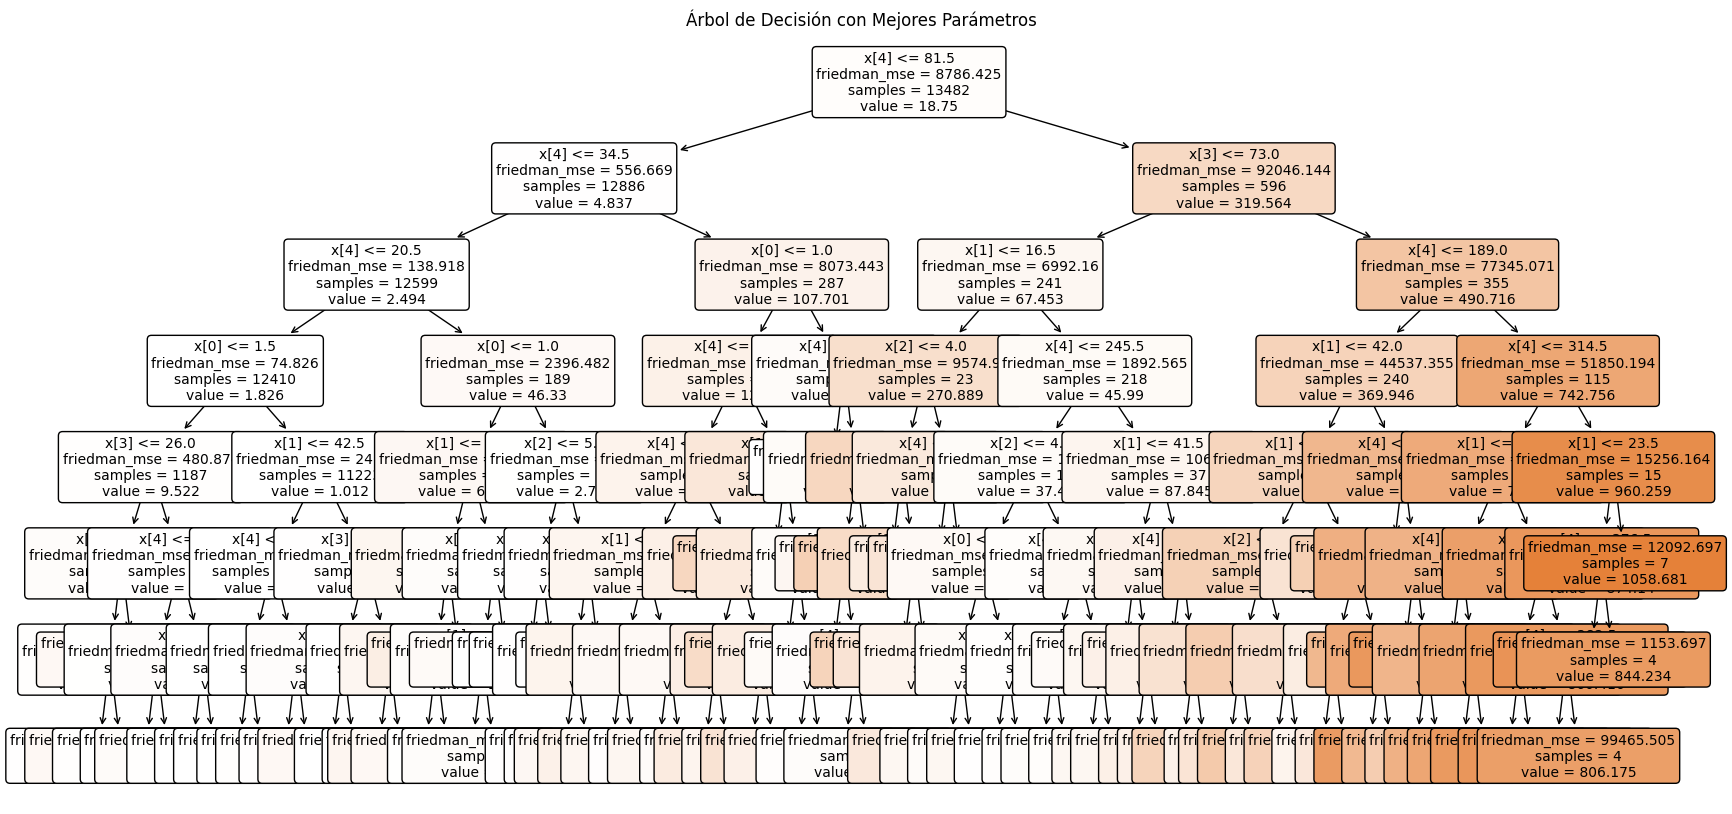

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))  # Tamaño de la figura
plot_tree(best_model, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión con Mejores Parámetros")
plt.show()